In [1]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fi =  "indata/3pipes3.inp"     #location of .inp file
fcr = "indata/bcs3pipesr.config"  #location of .config file
fc0 = "indata/bcs3pipes0.config"  #location of .config file
mtype = 1                       #model used along network edges. 1 for Preissman Slot. 0 for uniform
n0 = PyNetwork(fi, fc0, mtype)   #a network object
nr = PyNetwork(fi, fcr,mtype)
print n0 



Network at address 0x102e22040 with 4 nodes and 3 edges



In [3]:
#n1.showCurrentData()    
dt = n0.T/n0.M
V00 = n0.getTotalVolume()
n0.runForwardProblem(dt)  #solve up to time T
V0r = nr.getTotalVolume()
nr.runForwardProblem(dt)


In [4]:
print "Elapsed time is %.5f s, solve time is %.5f s" %(n0.T,n0.solve_time)
print "Initial Volume is %f"%V00

dV0 = V00-n0.getTotalVolume()
dVr = V0r-nr.getTotalVolume()
print "         Q =0             reflecting       "
print "V0       %3.5f        %3.5f" %(V00,V0r)
print "Vf       %3.5f        %3.5f" %(n0.getTotalVolume(), nr.getTotalVolume())
print "dV       %3.5f          %3.5f" % (dV0,dVr)
print "dV/V0    %e     %e"%(dV0/V00, dVr/V0r)

Elapsed time is 12.00000 s, solve time is 5.42139 s
Initial Volume is 168.393590
         Q =0             reflecting       
V0       168.39359        168.39359
Vf       167.97089        168.39359
dV       0.42269          0.00000
dV/V0    2.510159e-03     1.542662e-13


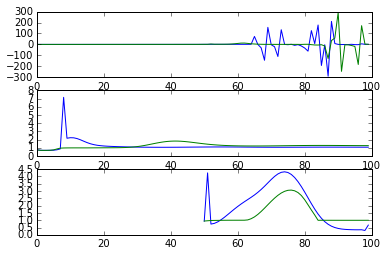

0.999263117838
[136.44625331411066, 120.29285276117274, 120.38954889341173]
cmax*dt/dx = 0.619942 
0.943047181565
0.766331438235
0.933805082504
max H(r)    291.782277 1.822158 3.064577
max H(0)    210.458684 7.151514 4.317828
383.443855613
30812.8818359


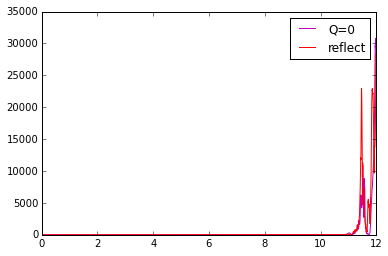

In [5]:
qi = [n0.q(i) for i in range(n0.Nedges)]
hi = [n0.getHofA(i) for i in range(3)]
hir = [nr.getHofA(i) for i in range(3)]
Ai = [qi[i][0:n0.Ns[i]] for i in range(3)]
Qi = [qi[i][n0.Ns[i]:] for i in range(3)] 
u= []
ymaxs = [ceil(max(h)) for h in hi]
for i in range(3):
        u.append([Qi[i][k]/Ai[i][k] for k in range(n0.Ns[i])])

fig,ax = plt.subplots(nrows = n0.Nedges)
x0 = [0,0,100.-n0.Ns[2]]
for k in range(n0.Nedges):
    x = np.arange(0,n0.Ls[k], n0.Ls[k]/n0.Ns[k])+x0[k]*np.ones(size(hi[k]))
    ax[k].plot(x,hi[k],'b')
    ax[k].plot(x,hir[k],'g')
    #ax[k].set_ylim([0,ymaxs[i]])
    ax[k].set_xlim([0,100])
    #ax[k].set_yticks(np.linspace(0,ymaxs[i],6))
plt.show()
print n0.getAveGradH(600)
umax = max(abs(max(ui)) for ui in u)
print n0.cmax
print "cmax*dt/dx = %f "%((max(n0.a)+umax)*dt/n0.Ls[0]*n0.Ns[0])
print hi[0][99]
print hi[1][0]
print hi[2][0]
 
print "max H(r)    %f %f %f"%(max(hir[0]), max(hir[1]), max(hir[2]))
print "max H(0)    %f %f %f"%(max(hi[0]), max(hi[1]), max(hi[2]))
Hbar = [n0.getAveGradH(i) for i in range(n0.M+1)]
Hbarr = [nr.getAveGradH(i) for i in range(nr.M+1)]
print mean(Hbar)
t = np.linspace(0,n0.T,n0.M+1)
plot(t,Hbar,'m')
plot(t,Hbarr,'r')
legend(['Q=0', 'reflect'])
print max(Hbar)

In [6]:
ndof = 8

wn = np.array([1,2])
x0 = 0*np.ones(ndof*len(wn))
for i in range(ndof*len(wn)/2):
    x0[2*i+1] = 0
opt1 = PyBC_opt_dh(fi, fc0, ndof, x0, 1, wn)


opt1.compute_f()

f0 = opt1.f
print "f is %f" %opt1.f
print "T is %f" %opt1.T
print "Using %s modes" %opt1.modetype


KeyboardInterrupt: 

In [ ]:
opt1.solve()

In [8]:
ndof2 = 16
x02 = np.zeros(ndof2*len(wn));
opt2 = PyBC_opt_dh(fi, fc0, ndof2, x02, 0, wn)
f02 = opt2.f
opt2.compute_f()
print "f is %f" %opt2.f
print "T is %f" %opt2.T
print "Using %s modes" %opt2.modetype



f is 477.333745
T is 12.000000
Using Hermite modes


In [9]:

opt2.solve()
#opt1.x
#opt1.r


8.94694414851e-05
[-0.00400763563835727, 0.13746231079215449, -0.029195698732393437, -0.022319031915815583, 0.004280893856445223, -0.00046249255308220444, -0.10388901499406085, -0.036792520030905815, 6.851892939554415e-05, -1.627659595437106e-05, 2.9757261992503203e-06, 7.055413242161472e-06, 2.4457148908736392e-05, -6.471498508137809e-05, -1.874099199714887e-05, -1.8757856549127958e-05]
max discrepancy is 1.089964e+00


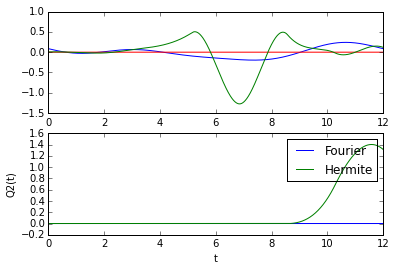

In [17]:
#import matplotlib.pyplot as plt

ff = opt1.f
ff2 = opt2.f
Q1 = opt1.getBCtimeseries(0)
Q2 = opt1.getBCtimeseries(1)
Q12 = opt2.getBCtimeseries(0)
Q22  = opt2.getBCtimeseries(1)
t = np.linspace(0,opt1.T, opt1.M+1)
fig,ax = plt.subplots(nrows = 2)

ax[0].plot(t,Q1,'b',t,np.zeros(opt1.M+1),'r')
ax[0].plot(t,Q12,'g')
xlabel('t')
ylabel('Q1(t)')
ax[1].plot(t,Q2,'b')#,t,np.zeros(opt1.M+1),'r')
ax[1].plot(t,Q22, 'g')
legend([opt1.modetype, opt2.modetype])
xlabel('t')
ylabel('Q2(t)')
print max(abs(Q2[i]) for i in range(len(Q2)))
print opt1.x
print "max discrepancy is %e"%max([Q1[i]-Q12[i] for i in range(len(Q1))])



In [11]:
print "                %s         %s"    %(opt1.modetype, opt2.modetype)
print "CPU time (s)    %4.2f     %4.2f" % (opt1.solve_t, opt2.solve_t)
print "actual time (s) %4.2f      %4.2f" % (opt1.wsolve_t,opt2.wsolve_t)
#print "WIN             %1.1f         %1.1f "%(opt1.solve_t/opt1.wsolve_t, opt2.solve_t/opt2.wsolve_t)
print "f0              %4.2f      %4.2f"%(f0,f0)
print "ff              %4.2f       %4.2f" %(ff,ff2)
print "f0/ff  =        %.5f %.5f"%(ff/f0, ff2/f0)
#print opt1.x

                Fourier         Hermite
CPU time (s)    1195.45     2479.10
actual time (s) 173.48      322.31
f0              477.33      477.33
ff              443.85       271.43
f0/ff  =        0.92984 0.56864


In [14]:
for i in range(len(x02)):
    x02[i] = opt2.x[i]
print x02

[  6.37327629e-03   1.69841876e-02  -2.21293859e-02  -1.31934005e-02
   1.00375823e-01   7.92254741e-02   4.80924417e-01   4.54877479e-01
  -1.27405810e+00   3.36093170e-02   4.27046153e-01  -8.11073054e-01
  -2.16663291e-02  -3.25164298e-01   1.17902433e-01  -2.77473148e-01
  -5.02036438e-08  -2.86646579e-05   5.87357537e-05  -1.82317061e-05
  -2.80825924e-05   5.79760659e-05   3.04921414e-05   5.60623089e-05
   3.01151387e-05  -9.85573203e-05   1.92118958e-05   8.06113890e-05
   6.95707856e-01   1.00486269e+00   1.31268417e+00  -4.36389463e-01]


In [16]:
opt3 = PyBC_opt_dh(fi, fc0, ndof2, x02, 0, wn)
opt3.compute_f()
print opt3.f

271.430097453
